In [3]:
# Set the working directory to the folder 
import os

os.chdir('/Users/rozani/Desktop/capstone')


In [15]:
#filter warnings
import warnings
warnings.filterwarnings("ignore")

# importing the libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# load the data
df = pd.read_csv('combined_data.csv')
print(df.head())

  Rfrg_Prvdr_Geo_Lvl Rfrg_Prvdr_Geo_Cd Rfrg_Prvdr_Geo_Desc  \
0           National          National            National   
1              State                01             Alabama   
2              State                02              Alaska   
3              State                04             Arizona   
4              State                05            Arkansas   

                         RBCS_Lvl RBCS_Id                           RBCS_Desc  \
0  Drugs Administered Through DME  DG000N  DME-Drugs Administered Through DME   
1  Drugs Administered Through DME  DG000N  DME-Drugs Administered Through DME   
2  Drugs Administered Through DME  DG000N  DME-Drugs Administered Through DME   
3  Drugs Administered Through DME  DG000N  DME-Drugs Administered Through DME   
4  Drugs Administered Through DME  DG000N  DME-Drugs Administered Through DME   

  HCPCS_Cd                                         HCPCS_Desc Suplr_Rentl_Ind  \
0    J1817  Insulin for administration through dme (i.e., .

In [6]:
# look at meta information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295052 entries, 0 to 295051
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Rfrg_Prvdr_Geo_Lvl        295052 non-null  object 
 1   Rfrg_Prvdr_Geo_Cd         295052 non-null  object 
 2   Rfrg_Prvdr_Geo_Desc       295052 non-null  object 
 3   RBCS_Lvl                  295052 non-null  object 
 4   RBCS_Id                   295052 non-null  object 
 5   RBCS_Desc                 295052 non-null  object 
 6   HCPCS_Cd                  295052 non-null  object 
 7   HCPCS_Desc                295052 non-null  object 
 8   Suplr_Rentl_Ind           295052 non-null  object 
 9   Tot_Rfrg_Prvdrs           295052 non-null  int64  
 10  Tot_Suplrs                295052 non-null  int64  
 11  Tot_Suplr_Benes           295052 non-null  int64  
 12  Tot_Suplr_Clms            295052 non-null  int64  
 13  Tot_Suplr_Srvcs           295052 non-null  i

In [7]:
# checking the meta information about numeric data
df.describe()

,Tot_Rfrg_Prvdrs,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Sbmtd_Chrg,Avg_Suplr_Mdcr_Alowd_Amt,Avg_Suplr_Mdcr_Pymt_Amt,Avg_Suplr_Mdcr_Stdzd_Amt,Year
count,295052.000000,295052.000000,2.950520e+05,2.950520e+05,2.950520e+05,295052.000000,295052.000000,295052.000000,295052.000000,295052.000000
mean,478.617389,94.377811,1.669243e+03,4.371272e+03,8.308191e+04,541.914611,340.286895,263.389244,264.211759,2016.982559
std,4182.212235,686.054495,2.582794e+04,7.647500e+04,2.317080e+06,1779.176800,1185.537687,919.359151,918.386705,1.997253
min,1.000000,1.000000,1.100000e+01,1.100000e+01,1.100000e+01,0.010000,0.008502,0.000000,0.000000,2014.000000
25%,16.000000,7.000000,3.300000e+01,3.300000e+01,5.400000e+01,19.356810,9.490000,7.156527,7.377184,2015.000000
50%,47.000000,17.000000,8.900000e+01,1.210000e+02,3.050000e+02,92.209884,48.734234,36.761085,37.475500,2017.000000
75%,180.000000,49.000000,2.950000e+02,6.000000e+02,3.015000e+03,393.327683,206.049899,159.055466,162.316674,2019.000000
max,271965.000000,49095.000000,3.495668e+06,1.049898e+07,6.088455e+08,70913.335385,39757.345417,31071.560000,31019.030000,2020.000000


In [8]:
#Finding unique values 

# unique values in each columns
for x in df.columns:
    #prinfting unique values
    print(x ,':', len(df[x].unique()))

Rfrg_Prvdr_Geo_Lvl : 2
Rfrg_Prvdr_Geo_Cd : 62
Rfrg_Prvdr_Geo_Desc : 62
RBCS_Lvl : 5
RBCS_Id : 37
RBCS_Desc : 13
HCPCS_Cd : 1764
HCPCS_Desc : 1874
Suplr_Rentl_Ind : 2
Tot_Rfrg_Prvdrs : 7718
Tot_Suplrs : 3277
Tot_Suplr_Benes : 14261
Tot_Suplr_Clms : 20878
Tot_Suplr_Srvcs : 47531
Avg_Suplr_Sbmtd_Chrg : 288751
Avg_Suplr_Mdcr_Alowd_Amt : 271586
Avg_Suplr_Mdcr_Pymt_Amt : 292386
Avg_Suplr_Mdcr_Stdzd_Amt : 287857
Year : 7
high_charges : 2
low_service_volumes : 2
is_underserved : 2
underserved_level : 3


## One-Hot Encoding

In [16]:
# Extract the column names for categorical (object-type) columns
categorical_col_names = df.select_dtypes(include=['object']).columns

# Print the list of categorical column names
print(categorical_col_names)

Index(['Rfrg_Prvdr_Geo_Lvl', 'Rfrg_Prvdr_Geo_Cd', 'Rfrg_Prvdr_Geo_Desc',
       'RBCS_Lvl', 'RBCS_Id', 'RBCS_Desc', 'HCPCS_Cd', 'HCPCS_Desc',
       'Suplr_Rentl_Ind', 'underserved_level'],
      dtype='object')


In [17]:
#  choose the categorical columns to apply OneHotEncoding
categorical_col_names = ['Rfrg_Prvdr_Geo_Lvl', 'RBCS_Lvl', 'RBCS_Id', 'Suplr_Rentl_Ind','HCPCS_Cd']

# Apply OneHotEncoder to the chosen categorical columns
encoder = OneHotEncoder(sparse=False)
one_hot_encoded = encoder.fit_transform(df[categorical_col_names])

# Convert the one-hot encoded array back to a DataFrame for better usability
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_col_names))

#  Print the first few rows of the new DataFrame
print(one_hot_df.head())

   Rfrg_Prvdr_Geo_Lvl_National  Rfrg_Prvdr_Geo_Lvl_State  \
0                          1.0                       0.0   
1                          0.0                       1.0   
2                          0.0                       1.0   
3                          0.0                       1.0   
4                          0.0                       1.0   

   RBCS_Lvl_Drugs Administered Through DME  \
0                                      1.0   
1                                      1.0   
2                                      1.0   
3                                      1.0   
4                                      1.0   

   RBCS_Lvl_Durable Medical Equipment  RBCS_Lvl_Non-DME  \
0                                 0.0               0.0   
1                                 0.0               0.0   
2                                 0.0               0.0   
3                                 0.0               0.0   
4                                 0.0               0.0   

   RBCS

## Dimensionality reduction

In [19]:
# Identify numerical columns
numerical_col_names = df.select_dtypes(include=[np.number]).columns.tolist()

#  Standardize the numerical data
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(df[numerical_col_names])


In [20]:
#  Combine the standardized numerical data and one-hot encoded categorical data
combined_data = np.hstack((numerical_scaled, one_hot_encoded))

#  Apply PCA on the combined data
pca_combined = PCA()
pca_combined.fit(combined_data)

PCA()

In [21]:
#  Get explained variance for combined PCA
explained_variance_combined = pca_combined.explained_variance_ratio_

#  Determine the number of components to retain 80% variance
threshold = 0.80
cumulative_variance_combined = np.cumsum(explained_variance_combined)
n_components_combined = np.argmax(cumulative_variance_combined >= threshold) + 1

In [22]:
#  Transform the combined data using the selected number of components
pca_final_combined = PCA(n_components=n_components_combined)
principal_components_combined = pca_final_combined.fit_transform(combined_data)


In [23]:
#  Create a DataFrame with the principal components for the combined data
principal_df_combined = pd.DataFrame(data=principal_components_combined, 
                                      columns=[f'PC_combined{i+1}' for i in range(n_components_combined)])

In [24]:
#  Get the loadings for the combined PCA
loadings_combined = pca_final_combined.components_.T  # Transpose to have features in rows

# Create a unique index for loadings_df_combined
unique_index = np.concatenate((numerical_col_names, encoder.get_feature_names_out(categorical_col_names)))
loadings_df_combined = pd.DataFrame(loadings_combined, index=unique_index, columns=[f'PC_combined{i+1}' for i in range(n_components_combined)])

print("\n Loadings:")
print(loadings_df_combined)


 Loadings:
                 PC_combined1  PC_combined2  PC_combined3  PC_combined4  \
Tot_Rfrg_Prvdrs     -0.055496      0.505507     -0.091018     -0.058032   
Tot_Suplrs          -0.050807      0.445865      0.214979      0.146395   
Tot_Suplr_Benes     -0.052327      0.501235     -0.216112     -0.145136   
Tot_Suplr_Clms      -0.051369      0.491592     -0.184118     -0.124815   
Tot_Suplr_Srvcs     -0.024212      0.198983      0.748296      0.490274   
...                       ...           ...           ...           ...   
HCPCS_Cd_V2780      -0.000010     -0.000005     -0.000001      0.000004   
HCPCS_Cd_V2782      -0.000044     -0.000021     -0.000012      0.000030   
HCPCS_Cd_V2783      -0.000037     -0.000017      0.000007      0.000002   
HCPCS_Cd_V2784      -0.000116     -0.000053     -0.000020      0.000061   
HCPCS_Cd_V2799      -0.000033     -0.000017     -0.000002      0.000013   

                 PC_combined5  PC_combined6  
Tot_Rfrg_Prvdrs     -0.004584 -7.905539e-

In [25]:
 # Get top features for each principal component
top_features = {}
for i in range(n_components_combined):  # Loop over the number of components
    top_features[f'PC_combined{i+1}'] = loadings_df_combined.iloc[:, i].abs().nlargest(5)  # Get top 5 features

# Display top features for each principal component
top_features_df = pd.DataFrame(top_features)
print("\nTop Features for Each Principal Component:")
print(top_features_df)



Top Features for Each Principal Component:
                                    PC_combined1  PC_combined2  PC_combined3  \
Avg_Suplr_Mdcr_Alowd_Amt                0.499127           NaN           NaN   
Avg_Suplr_Mdcr_Pymt_Amt                 0.499186           NaN           NaN   
Avg_Suplr_Mdcr_Stdzd_Amt                0.498619           NaN           NaN   
Avg_Suplr_Sbmtd_Chrg                    0.488558           NaN           NaN   
RBCS_Id_DF000N                               NaN           NaN           NaN   
RBCS_Lvl_Durable Medical Equipment           NaN           NaN           NaN   
RBCS_Lvl_Orthotic Devices                    NaN           NaN           NaN   
Suplr_Rentl_Ind_N                            NaN           NaN           NaN   
Suplr_Rentl_Ind_Y                            NaN           NaN           NaN   
Tot_Rfrg_Prvdrs                         0.055496      0.505507           NaN   
Tot_Suplr_Benes                              NaN      0.501235      0.216112

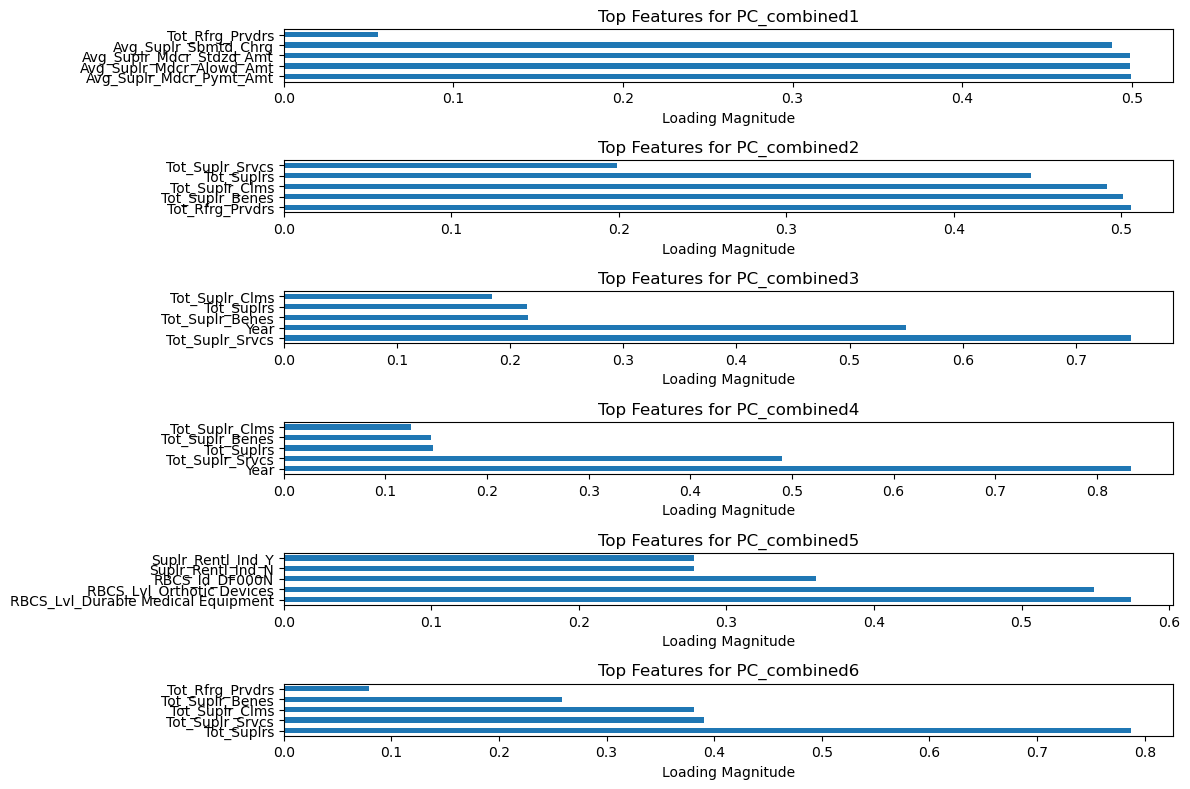

In [15]:
# Set up the figure
plt.figure(figsize=(12, 8))

# Plot each principal component's top features
for i in range(n_components_combined):
    plt.subplot(n_components_combined, 1, i + 1)
    top_features = loadings_df_combined.iloc[:, i].abs().nlargest(5)  # Get the top 5 features
    top_features.plot(kind='barh', title=f'Top Features for PC_combined{i+1}')
    plt.xlabel('Loading Magnitude')
    plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
    plt.yticks(fontsize=10)  # Set font size for y-axis labels

plt.tight_layout()
plt.show()

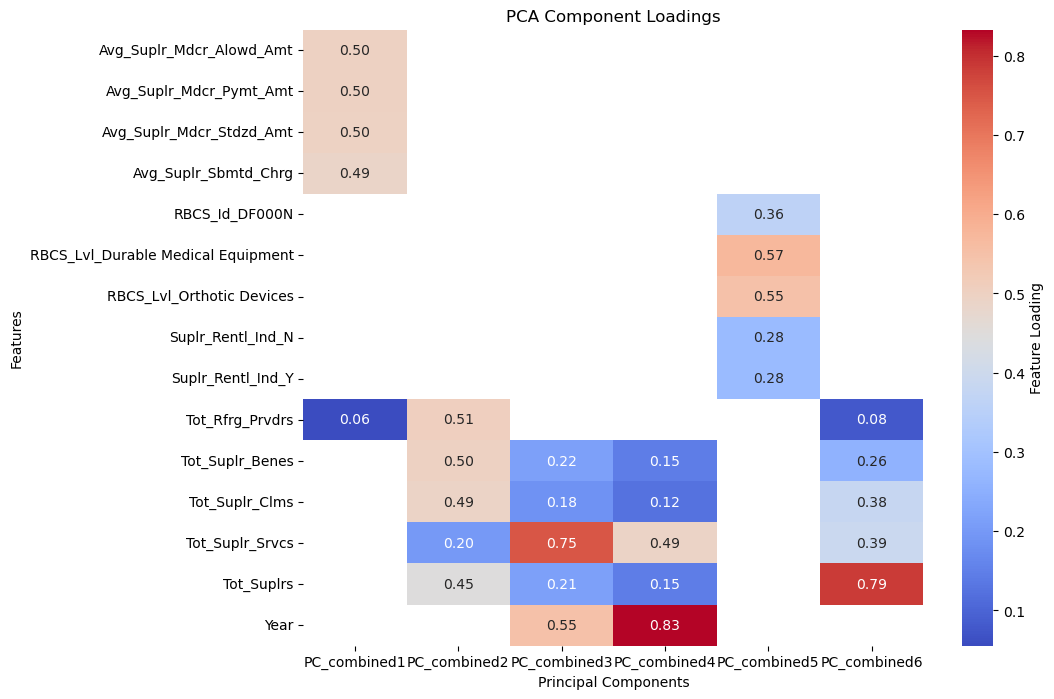

In [31]:
# Plotting heatmap with enhanced formatting
plt.figure(figsize=(10, 8))  
sns.heatmap(top_features_df, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Feature Loading'})
plt.title('PCA Component Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()

In [32]:
#  Combine the principal components with the original DataFrame
combined_df = pd.concat([principal_df_combined, df.reset_index(drop=True)], axis=1)

PCA_combined = combined_df

# create a csv file
PCA_combined.to_csv('PCA_combined.csv', index=False) 